In [11]:
%cd /home/bap/hana/EDA and Visualization/hanlhn/hanlhn

/home/bap/hana/EDA and Visualization/hanlhn/hanlhn


In [12]:
!pwd

/home/bap/hana/EDA and Visualization/hanlhn/hanlhn


## Import Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

## About this `Dataset`

Content
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

1. `instant`: Record index  
2. `dteday`: Date  
3. `season`: Season (1:springer, 2:summer, 3:fall, 4:winter)  
4. `yr`: Year (0: 2011, 1:2012)  
5. `mnth`: Month (1 to 12)  
6. `hr`: Hour (0 to 23)   
7. `holiday`: weather day is holiday or not (extracted from Holiday Schedule)  
8. `weekday`: Day of the week   
9. `workingday`: If day is neither weekend nor holiday is 1, otherwise is 0.   
10. `weathersit`: (extracted from Freemeteo)  
    1: Clear, Few clouds, Partly cloudy, Partly cloudy  
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
11. `temp`: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)  
12. `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)  
13. `hum`: Normalized humidity. The values are divided to 100 (max)  
14. `windspeed`: Normalized wind speed. The values are divided to 67 (max)  
15. `casual`: count of casual users  
16. `registered`: count of registered users   
17. `cnt`: count of total rental bikes including both casual and registered  

## Load Dataset

In [14]:
data = pd.read_csv('dataset/dataset_02/Bike-Sharing-Dataset/hour.csv')
data.columns = ['id', 'date', 'season', 'year', 'month', 
                'hour', 'is_holiday', 'day_of_week', 'is_working_day', 
                'weather_condition', 'temperature', 'alike_temperature',
                'humidity', 'wind_speed', 'casual', 'registered', 'total_count']
data.head(5)

id        date  season  year  month  hour  is_holiday  day_of_week  \
0   1  2011-01-01       1     0      1     0           0            6   
1   2  2011-01-01       1     0      1     1           0            6   
2   3  2011-01-01       1     0      1     2           0            6   
3   4  2011-01-01       1     0      1     3           0            6   
4   5  2011-01-01       1     0      1     4           0            6   

   is_working_day  weather_condition  temperature  alike_temperature  \
0               0                  1         0.24             0.2879   
1               0                  1         0.22             0.2727   
2               0                  1         0.22             0.2727   
3               0                  1         0.24             0.2879   
4               0                  1         0.24             0.2879   

   humidity  wind_speed  casual  registered  total_count  
0      0.81         0.0       3          13           16  
1      0.80         0.0       8          32           40  
2      0.80         0.0       5          27           32  
3      0.75         0.0       3          10           13  
4      0.75         0.0       0           1            1

## Check null values

In [15]:
data.isna().sum()

id                   0
date                 0
season               0
year                 0
month                0
hour                 0
is_holiday           0
day_of_week          0
is_working_day       0
weather_condition    0
temperature          0
alike_temperature    0
humidity             0
wind_speed           0
casual               0
registered           0
total_count          0
dtype: int64

## Check duplicated values

In [16]:
data.duplicated().sum()

0

## Overview Dataset

In [17]:
profile = ProfileReport(data, title="Bike Sharing")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Setting proper data types

In [18]:
# date time conversion
data['date'] = pd.to_datetime(data.date)

# categorical variables
data['season'] = data.season.astype('category')
data['is_holiday'] = data.is_holiday.astype('category')
data['day_of_week'] = data.day_of_week.astype('category')
data['weather_condition'] = data.weather_condition.astype('category')
data['is_working_day'] = data.is_working_day.astype('category')
data['month'] = data.month.astype('category')
data['year'] = data.year.astype('category')
data['hour'] = data.hour.astype('category')

## Decoding some feature columns

In [19]:
def season_decoder(x):
    season = ['Spring', 'Summer', 'Fall', 'Winter']
    return season[x-1]
    
def weather_decoder(x):
    weather = ['Clear', 'Mist', 'Light rain & snow', 'Heavy rain, snow and fog']
    return weather[x-1]

def day_of_week_decoder(x):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    return days[x-1]

data['year'] = data['year'].apply(lambda x: 2011 if x == 0 else 2012)
data['is_working_day_dec'] = data['is_working_day'].apply(lambda x: 'Working day' if x == 1 else 'Not working day')
data['season_dec'] = data['season'].apply(lambda x: season_decoder(x))
data['weather_dec'] = data['weather_condition'].apply(lambda x: weather_decoder(x))
data['day_of_week_dec'] = data['day_of_week'].apply(lambda x: day_of_week_decoder(x))
data.head(5)

id       date season  year month hour is_holiday day_of_week  \
0   1 2011-01-01      1  2011     1    0          0           6   
1   2 2011-01-01      1  2011     1    1          0           6   
2   3 2011-01-01      1  2011     1    2          0           6   
3   4 2011-01-01      1  2011     1    3          0           6   
4   5 2011-01-01      1  2011     1    4          0           6   

  is_working_day weather_condition  ...  alike_temperature  humidity  \
0              0                 1  ...             0.2879      0.81   
1              0                 1  ...             0.2727      0.80   
2              0                 1  ...             0.2727      0.80   
3              0                 1  ...             0.2879      0.75   
4              0                 1  ...             0.2879      0.75   

   wind_speed  casual  registered  total_count  is_working_day_dec season_dec  \
0         0.0       3          13           16     Not working day     Spring   
1         0.0       8          32           40     Not working day     Spring   
2         0.0       5          27           32     Not working day     Spring   
3         0.0       3          10           13     Not working day     Spring   
4         0.0       0           1            1     Not working day     Spring   

  weather_dec day_of_week_dec  
0       Clear             Sat  
1       Clear             Sat  
2       Clear             Sat  
3       Clear             Sat  
4       Clear             Sat  

[5 rows x 21 columns]

## Correlation visualization

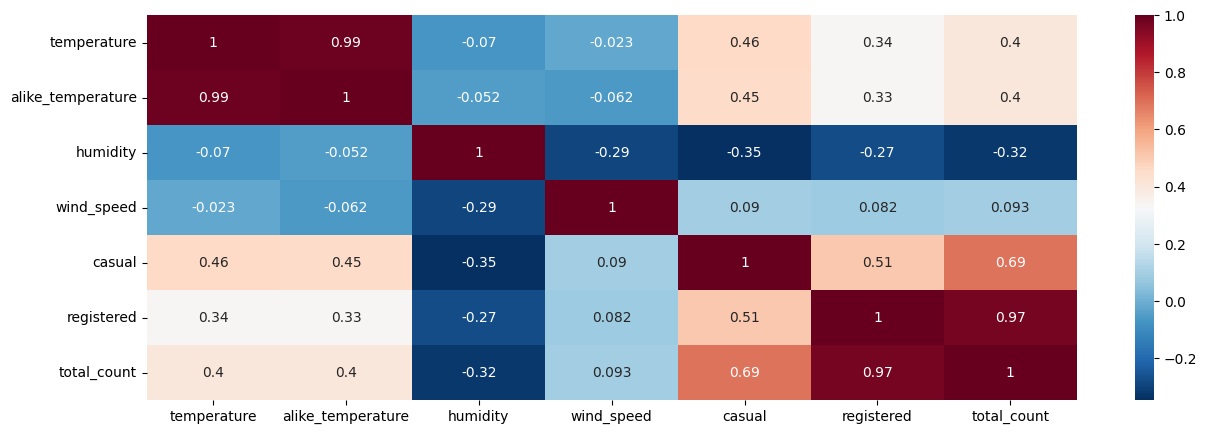

In [20]:
corr_features = ['hour', 'is_holiday', 'day_of_week', 
                'season', 'weather_condition', 'temperature', 
                'alike_temperature', 'humidity', 'wind_speed', 
                'casual', 'registered', 'total_count']
corr_mat = data[corr_features].corr()
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(corr_mat, cmap='RdBu_r', annot=True)

# Comments:
1. `Registered` and `Total count` have high correlation, approximately 1.
2. `Temperature` and `Alike temperature` have high correlation, approximately 1. One of them should be dropped.

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

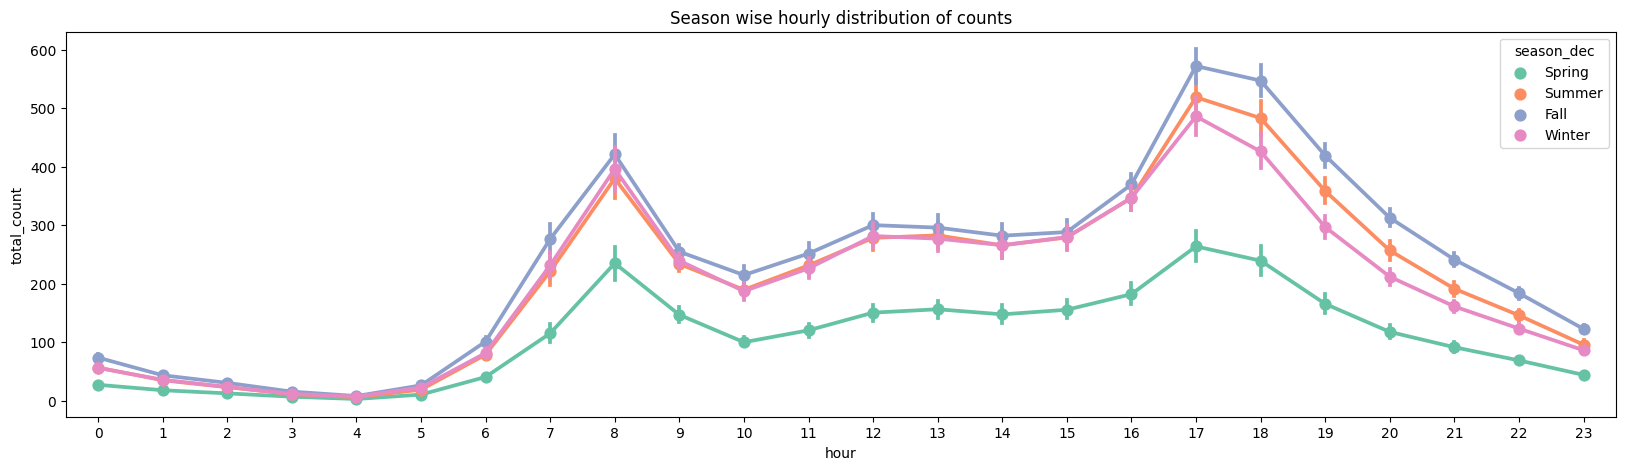

In [21]:
fig,ax = plt.subplots(figsize=(20, 5))
sns.pointplot(data=data[['hour',
                        'total_count',
                        'season_dec']],
              x='hour',
              y='total_count',
              hue='season_dec',
              ax=ax, 
              palette="Set2")
ax.set(title="Season wise hourly distribution of counts")

# Comments:
1. `In a day`, high amount of bike renting is around 8:00 AM and 17:00, 18:00 PM.
2. `In a year`, fall has the highest amount of bike renting, the 2nd is summer, 3rd is winter and the last is spring. 
3. Bike renting distribution is nearly the same between the seasons.

[Text(0.5, 1.0, 'Working day wise hourly distribution of counts')]

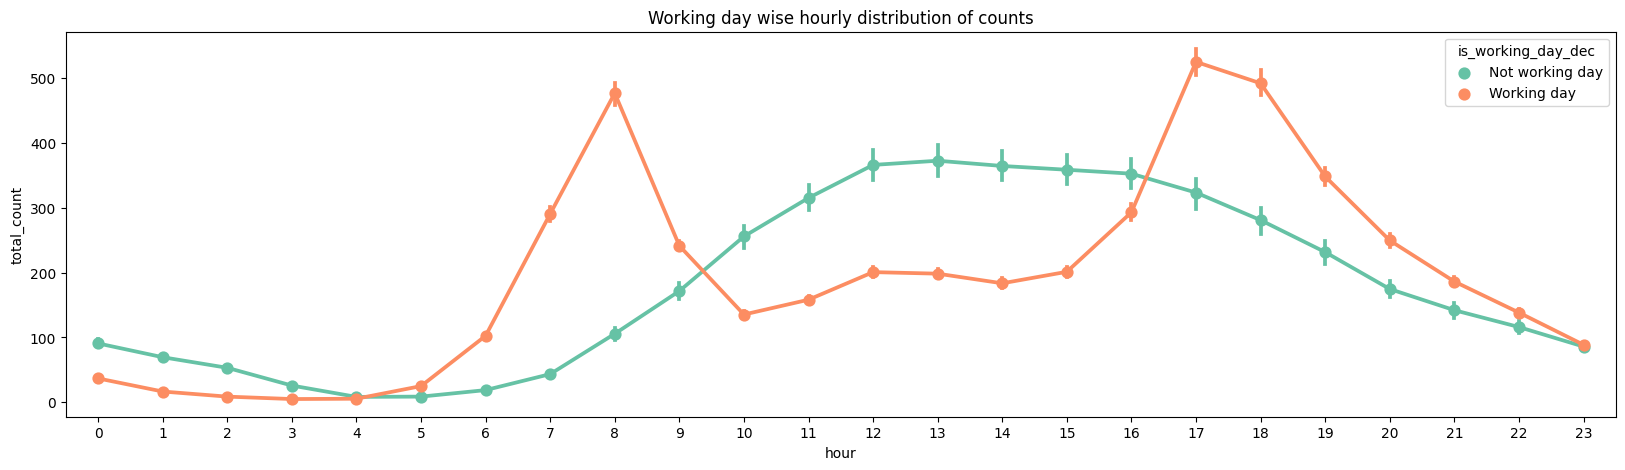

In [22]:
fig,ax = plt.subplots(figsize=(20, 5))
sns.pointplot(data=data[['hour',
                           'total_count',
                           'is_working_day_dec']],
              x='hour',
              y='total_count',
              hue='is_working_day_dec',
              ax=ax, 
              palette="Set2")
ax.set(title="Working day wise hourly distribution of counts")

# Comments:
1. `In working day`, high amount of bike renting is around 8:00 AM and 17:00, 18:00 PM. This is nearly the same as above plot.
2. `At the weekend`, high amount of bike renting is between 11:00 AM and 17:00 PM.

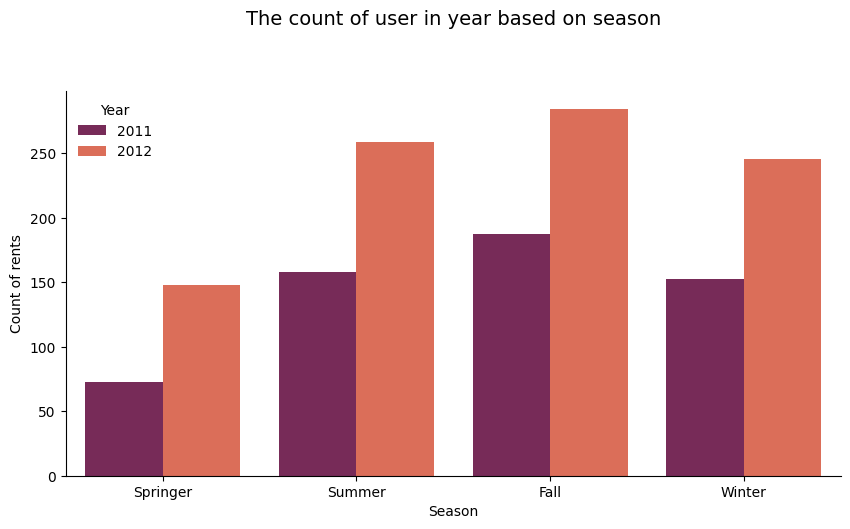

In [23]:
fig,ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=data, x="season_dec",  y="total_count", hue="year", palette="rocket",  ci=None)
sns.despine(top=True, right=True, left=False, bottom=False) # remove border

plt.ylabel('Count of rents')
plt.xlabel('Season')
plt.title("The count of user in year based on season", size=14, y=1.15)

plt.xticks([0,1,2,3], ['Springer', 'Summer', 'Fall', 'Winter'])

plt.legend(title='Year', loc='best', labels=['2011', '2012'], frameon=False)
plt.show(ax);

# Comments:
1. `Along 4 seasons`, fall and summer have higher amount of bike renting.
2. `In 2 years`, amount of bike renting increases strongly, approximately 100.

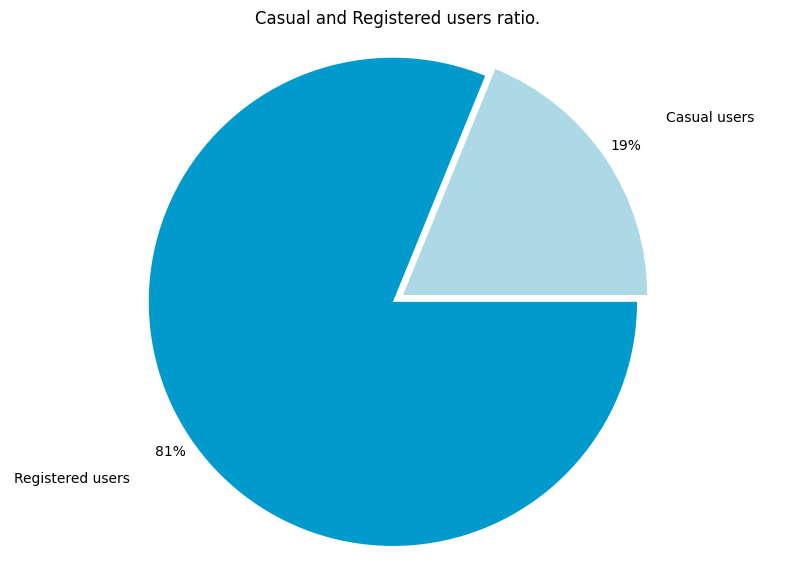

In [24]:
total_casual = data['casual'].sum()
total_register = data['registered'].sum()

casual_percentage = total_casual / (total_casual + total_register) * 100
register_percentage = 100 - casual_percentage

percentages = [casual_percentage, register_percentage]
explode=(0, 0.05)
color_palette_list = ['#ADD8E6', '#009ACD']
labels = ['Casual users', 'Registered users']
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(percentages, explode=explode, labels=labels,
       colors=color_palette_list[0:2], autopct='%1.0f%%',
       shadow=False, startangle=0,   
       pctdistance=1.1, labeldistance=1.3)
ax.axis('equal')
ax.set_title("Casual and Registered users ratio.")
plt.show()